In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
data = pd.read_csv('data3a.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data['f_int'] = (data.f == 'T').astype(int)

In [5]:
llh = np.sum(stats.poisson.logpmf(data.y,data.y))
deviance = -2*llh
residual_deviance = 0.0
aic = -2*(llh-100)
summary = [['full_model',llh,deviance,residual_deviance,aic]]

In [6]:
data.x_c = sm.add_constant(data.x)

In [8]:
model_const = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())
result_const = model_const.fit()
summary.append(['const',result_const.llf,-2*result_const.llf,result_const.deviance,result_const.aic])

In [9]:
model_x = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result_x = model_x.fit()
summary.append(['x',result_x.llf,-2*result_x.llf,result_x.deviance,result_x.aic])

In [10]:
summary_frame = pd.DataFrame(summary,columns=['model','log likelihood','deviance','residual deviance','AIC'])

In [11]:
summary_frame

,model,log likelihood,deviance,residual deviance,AIC
0,full_model,-192.889753,385.779505,0.000000,585.779505
1,const,-237.643221,475.286443,89.506938,477.286443
2,x,-235.386251,470.772502,84.992996,474.772502


In [18]:
np.random.seed(10)
data['yrand'] = np.random.poisson(np.exp(result_const.params[0]),100)
result_1 = sm.GLM(data.yrand,data.x_c['const'],family=sm.families.Poisson()).fit()
result_2 = sm.GLM(data.yrand,data.x_c,family=sm.families.Poisson()).fit()
deltaD = result_1.deviance - result_2.deviance
deltaD

2.7068337885096412

In [19]:
def get_dd(data):
    yrand = np.random.poisson(np.exp(result_const.params[0]),100)
    result = sm.GLM(yrand,data.x_c,family=sm.families.Poisson()).fit()
    return result.null_deviance - result.deviance

def pb(data,n_bootstrap):
    return np.array([get_dd(data) for i in range(n_bootstrap)])

dd12 = pb(data,1000)

In [21]:
dd12 = pd.Series(dd12)
print dd12.describe()

count    1.000000e+03
mean     9.896065e-01
std      1.401436e+00
min      8.017381e-09
25%      1.176491e-01
50%      4.837488e-01
75%      1.321751e+00
max      1.043786e+01
dtype: float64


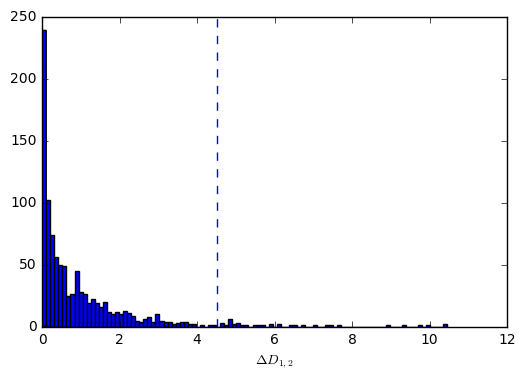

In [23]:
plt.hist(dd12,bins=100)
plt.xlabel('$\Delta D_{1,2}$')
plt.axvline(x=4.5,ls='--')

In [24]:
(dd12 >= 4.5).sum()

37

In [26]:
dd12.quantile(0.95)

3.5852910885017382

In [27]:
P = stats.chi2.sf(x=4.5,df=1)

In [28]:
P

0.033894853524689295